## Medical Cost Linear Regression Prediction

This notebook represents an EDA analys of the dataset and the prediction of the cost of treatment. The dataset has no data on the diagnosis of patients, but some information about if the man/women is a smoker, how many children has he/she, age and body mass index can help to make a conclusion about the health of patients and how much it costs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**EDA analysis**

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Distribution of charges will help to understand how much patients spend on treatment.

c:\Users\maryk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

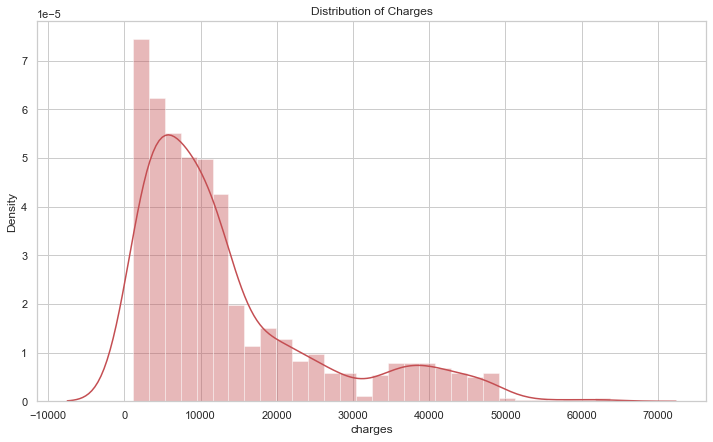

In [6]:
sns.set(style='whitegrid')

f, ax = plt.subplots(figsize = (12,7))
ax = sns.distplot(df['charges'], color = 'r')
plt.title('Distribution of Charges')

Apply **log** to normalize the distrubution

c:\Users\maryk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


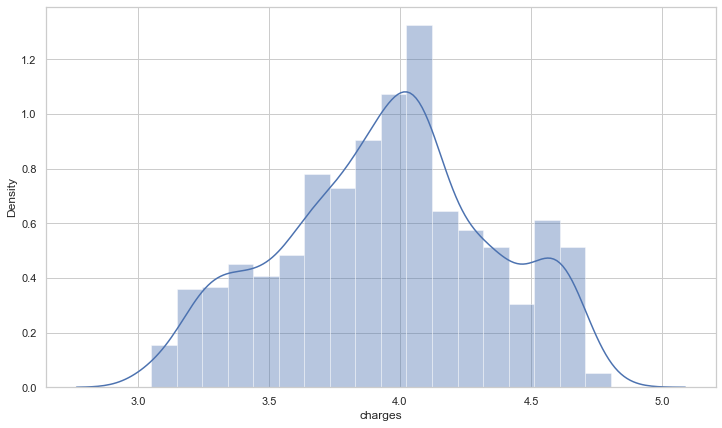

In [7]:
f, ax = plt.subplots(1, 1, figsize=(12,7))
ax = sns.distplot(np.log10(df['charges']), color = 'b')


How change medical charges depending of the amount of children

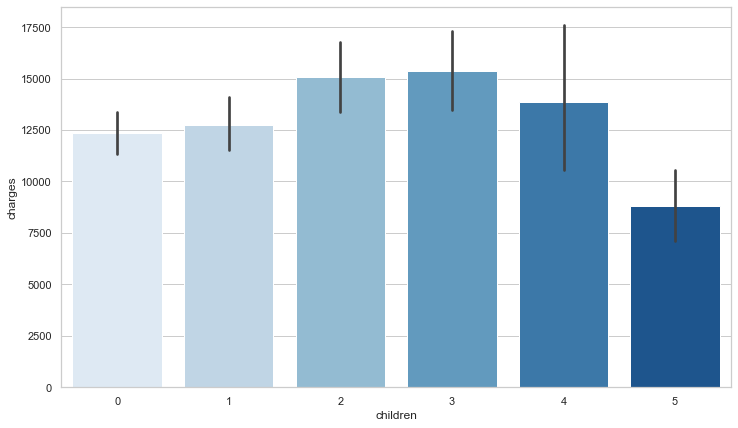

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x = 'children', y = 'charges', data = df, palette = 'Blues')

Charges by region

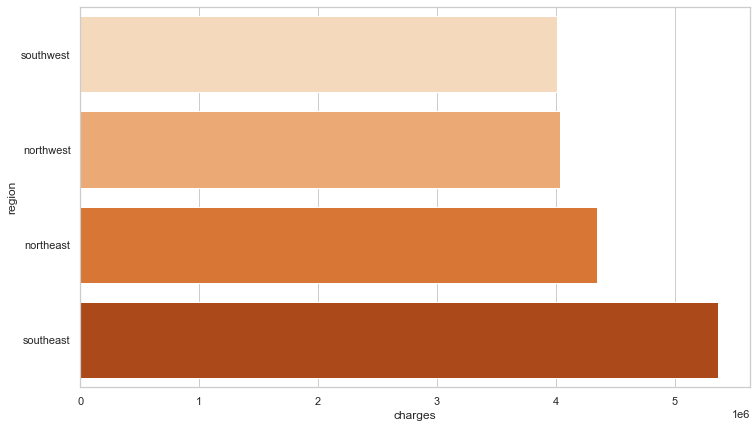

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 7))

charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
ax = sns.barplot(x = charges, y = charges.index, data = df, palette = 'Oranges')

Depending of the person is man or women

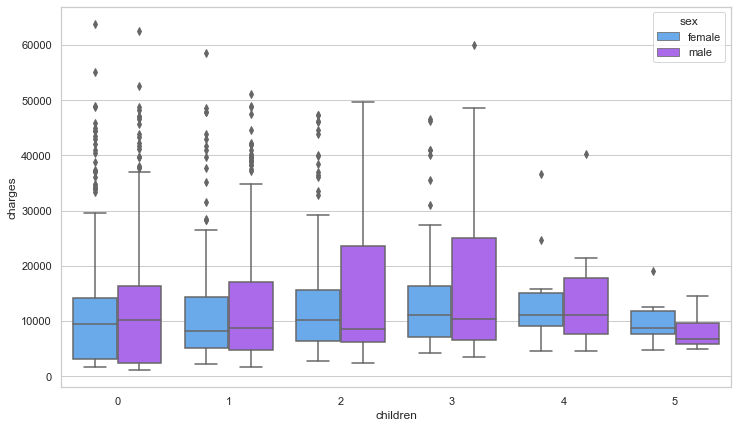

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.boxplot(x = 'children', y = 'charges', hue = 'sex', data = df, palette = 'cool')

Compare if the person smoke or not

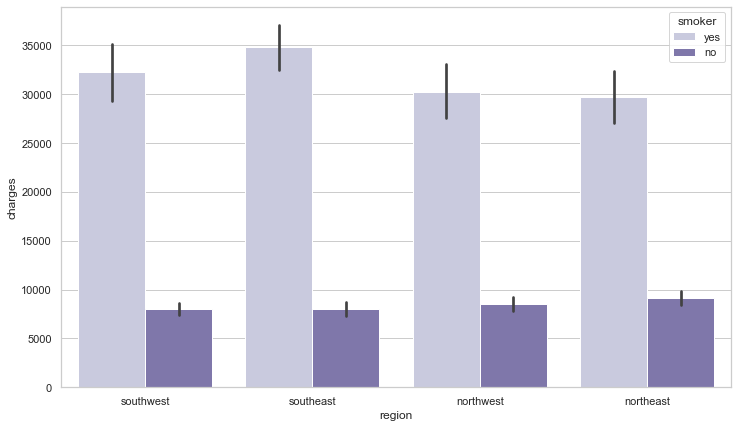

In [11]:
f, ax = plt.subplots(1,1, figsize=(12,7))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker', data=df, palette='Purples')

###### *the difference is huge

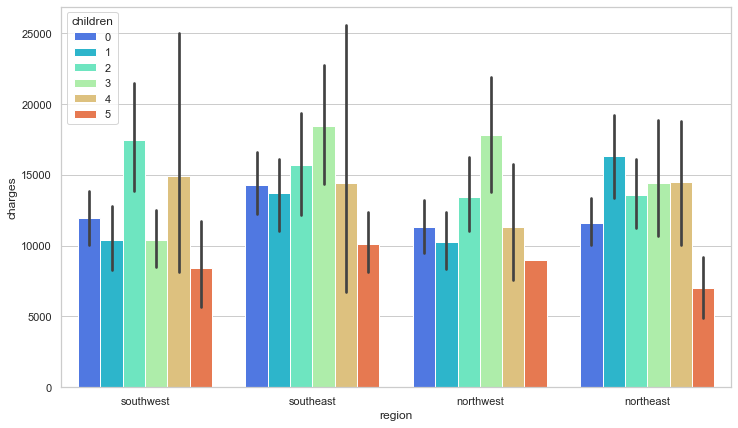

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='rainbow')

Charges by age, bmi and children according to the smoking factor

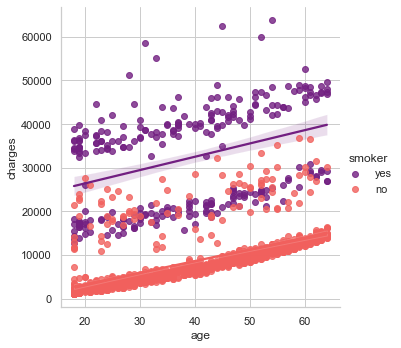

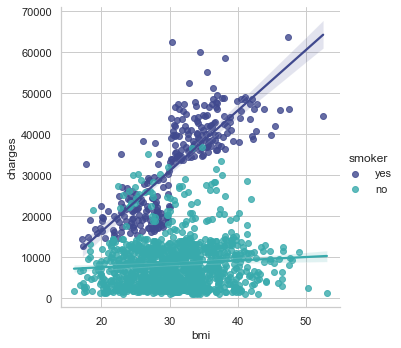

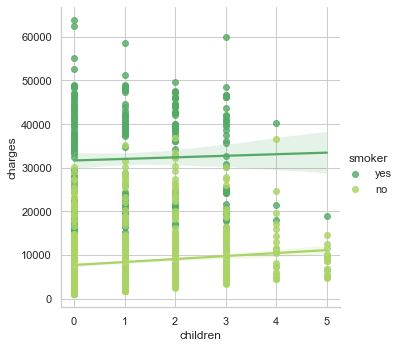

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'magma')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='mako')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='summer')

**Apply Label Encoder for the string data**

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

le = LabelEncoder()

le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates()) 
df.smoker= le.transform(df.smoker)

le.fit(df.region.drop_duplicates()) 
df.region= le.transform(df.region)



<AxesSubplot:>

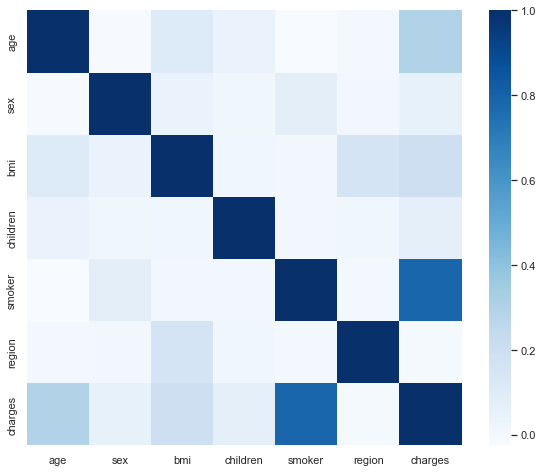

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), square=True, cmap = 'Blues')

The conclusion is the smoking has the highest impact on medical costs.

In [17]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

Pre-process data with **Polynomial Features**

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures (degree = 2)
X_pf = pf.fit_transform(X)

Split the data for train and test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, random_state = 0)
print(X_test)

[[ 1. 52.  1. ...  0.  0.  9.]
 [ 1. 47.  0. ...  0.  0.  4.]
 [ 1. 48.  1. ...  1.  1.  1.]
 ...
 [ 1. 51.  1. ...  0.  0.  4.]
 [ 1. 23.  1. ...  0.  0.  9.]
 [ 1. 61.  0. ...  1.  1.  1.]]


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.8846283666147683


The accuracy is pretty good, let us see the actual values and the predicted one

In [24]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
578,9724.53000,11979.213938
610,8547.69130,10192.589978
569,45702.02235,48786.769607
1034,12950.07120,14384.968914
198,9644.25250,8459.578713
...,...,...
574,13224.05705,16330.877542
1174,4433.91590,6856.667781
1327,9377.90470,11504.913218
817,3597.59600,3817.350960


Text(0, 0.5, 'Actual Values')

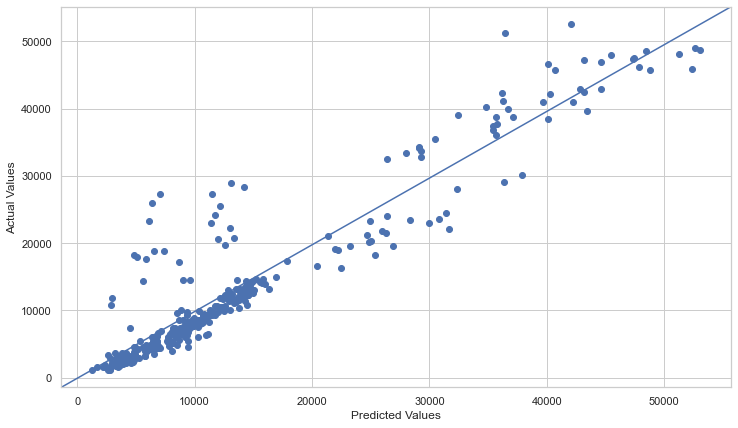

In [25]:
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot([0,1],[0,1], transform=ax.transAxes)
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
